Objective
To predict whether the patient will survive after 5 years or not based upon the patient's age, year of treatment and the number of positive lymph nodes

Data Description 
The Haberman's survival dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:

Age of patient at time of operation (numerical)
Patient's year of operation (year - 1900, numerical)
Number of positive axillary nodes detected (numerical)
Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 years

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")


haberman_df = pd.read_csv('haberman.csv', header=0, names=['age', 'year_of_treatment', 'positive_lymph_nodes', 'survival_status_after_5_years'])
print(haberman_df.head())




   age  year_of_treatment  positive_lymph_nodes  survival_status_after_5_years
0   30                 64                     1                              1
1   30                 62                     3                              1
2   30                 65                     0                              1
3   31                 59                     2                              1
4   31                 65                     4                              1


In [52]:
print(haberman_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age                              306 non-null int64
year_of_treatment                306 non-null int64
positive_lymph_nodes             306 non-null int64
survival_status_after_5_years    306 non-null int64
dtypes: int64(4)
memory usage: 9.7 KB
None


In [53]:
print(list(haberman_df['survival_status_after_5_years'].unique()))

[1, 2]


In [54]:
# how many data-points and features?
print (haberman_df.shape)

(306, 4)


In [55]:
# What are the column names in our dataset?
print (haberman_df.columns)

Index(['age', 'year_of_treatment', 'positive_lymph_nodes',
       'survival_status_after_5_years'],
      dtype='object')


In [56]:
#How many data points for each class are present? 

haberman_df["survival_status_after_5_years"].value_counts()
# balanced-dataset vs imbalanced datasets.

1    225
2     81
Name: survival_status_after_5_years, dtype: int64

In [57]:
print(haberman_df.describe())

              age  year_of_treatment  positive_lymph_nodes  \
count  306.000000         306.000000            306.000000   
mean    52.457516          62.852941              4.026144   
std     10.803452           3.249405              7.189654   
min     30.000000          58.000000              0.000000   
25%     44.000000          60.000000              0.000000   
50%     52.000000          63.000000              1.000000   
75%     60.750000          65.750000              4.000000   
max     83.000000          69.000000             52.000000   

       survival_status_after_5_years  
count                     306.000000  
mean                        1.264706  
std                         0.441899  
min                         1.000000  
25%                         1.000000  
50%                         1.000000  
75%                         2.000000  
max                         2.000000  


OBSERVATIONS

The age of the patients vary from 30 to 83 with the median of 52.

Although the maximum number of positive lymph nodes observed is 52, nearly 75% of the patients have less than 5 positive lymph nodes.

The dataset contains only a small number of records (306).

The target column is imbalanced with 73% of values are in the class - 'patient survived 5 years or longer' 

In [58]:
print(haberman_df.head())

   age  year_of_treatment  positive_lymph_nodes  survival_status_after_5_years
0   30                 64                     1                              1
1   30                 62                     3                              1
2   30                 65                     0                              1
3   31                 59                     2                              1
4   31                 65                     4                              1


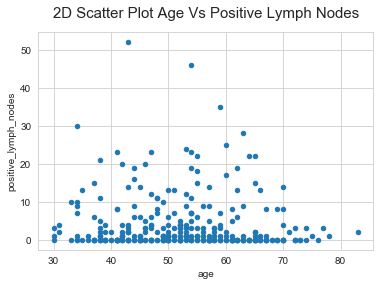

In [59]:
#2-D scatter plot:
#ALWAYS understand the axis: labels and scale.

haberman_df.plot(kind='scatter', x='age', y='positive_lymph_nodes');
plt.title("2D Scatter Plot Age Vs Positive Lymph Nodes",fontsize=15, y =1.04) 
plt.show()

#cannot make much sense out it. 


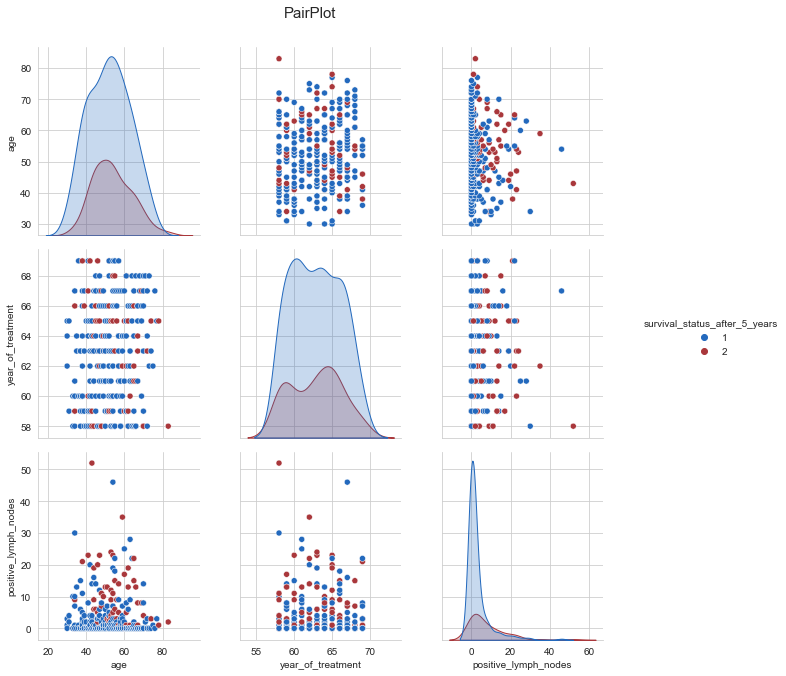

In [60]:
# pairwise scatter plot: Pair-Plot
 
sns.set_style("whitegrid");
sns.pairplot(haberman_df, hue="survival_status_after_5_years", size=3,palette="vlag");
plt.suptitle('PairPlot',fontsize =15,y =1.04,x = .4)
plt.show()
# NOTE: the diagnol elements are PDFs for each feature. PDFs are expalined below.

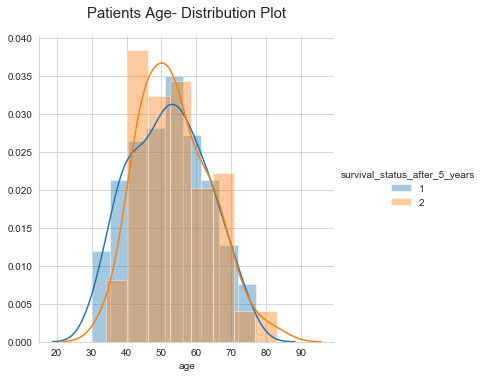

In [40]:
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)  
sns.FacetGrid(haberman_df, hue="survival_status_after_5_years", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.title("Patients Age- Distribution Plot",fontsize=15,y=1.04)
plt.show();

#cannot make much sense out it as graphs are overlapped

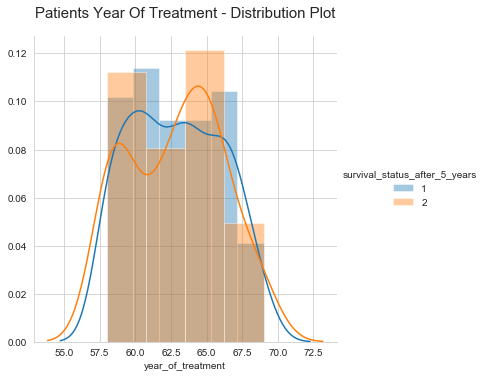

In [41]:
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)  
sns.FacetGrid(haberman_df, hue="survival_status_after_5_years", size=5) \
   .map(sns.distplot, "year_of_treatment") \
   .add_legend();
plt.title("Patients Year Of Treatment - Distribution Plot",fontsize=15,y=1.04)
plt.show();

#cannot make much sense out it as graphs are overlapped

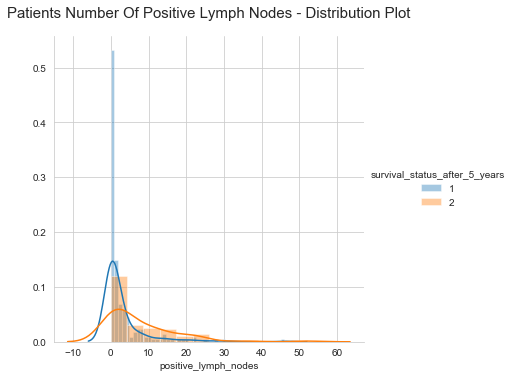

In [42]:
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)  
sns.FacetGrid(haberman_df, hue="survival_status_after_5_years", size=5) \
   .map(sns.distplot, "positive_lymph_nodes") \
   .add_legend();

plt.title("Patients Number Of Positive Lymph Nodes - Distribution Plot",fontsize=15,y=1.04)
plt.show();


#By univariate analysis we can deduce that positive lymph nodes is the most important feature to find survival status.


Obervation

Patients who survived more than 5 years had positive axillary nodes densed from 0-5 while patients who died within 5 years had positive axillary nodes densed from 0-20.

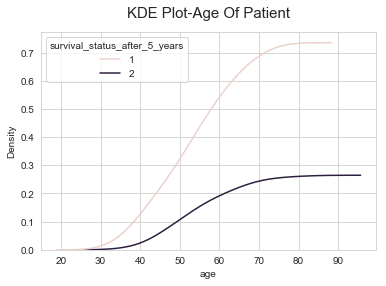

In [61]:
sns.kdeplot(data = haberman_df,x = 'age',hue='survival_status_after_5_years',cumulative =True)
plt.title("KDE Plot-Age Of Patient",fontsize=15,y=1.04)
plt.show();

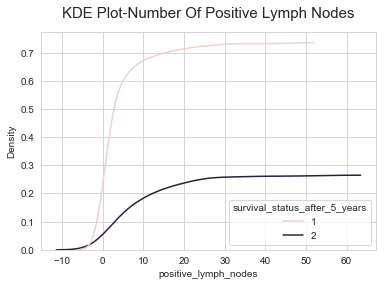

In [45]:
sns.kdeplot(data = haberman_df,x = 'positive_lymph_nodes',hue='survival_status_after_5_years',cumulative =True)
plt.title("KDE Plot-Number Of Positive Lymph Nodes",fontsize=15,y=1.04)
plt.show();

Box Plot

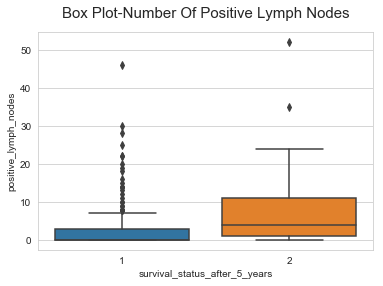

In [46]:
sns.boxplot(x ='survival_status_after_5_years',y='positive_lymph_nodes',data= haberman_df )
plt.title("Box Plot-Number Of Positive Lymph Nodes",fontsize=15,y=1.04)
plt.show();

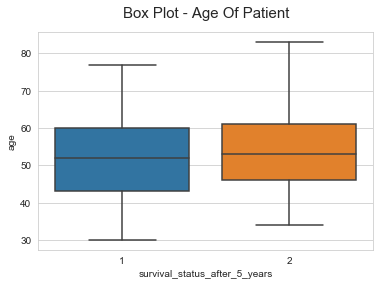

In [47]:
sns.boxplot(x ='survival_status_after_5_years',y='age',data= haberman_df )
plt.title("Box Plot - Age Of Patient",fontsize=15,y=1.04)
plt.show();

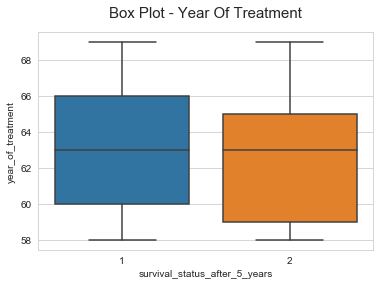

In [48]:
sns.boxplot(x ='survival_status_after_5_years',y='year_of_treatment',data= haberman_df )
plt.title("Box Plot - Year Of Treatment",fontsize=15,y=1.04)
plt.show();

Violin plot

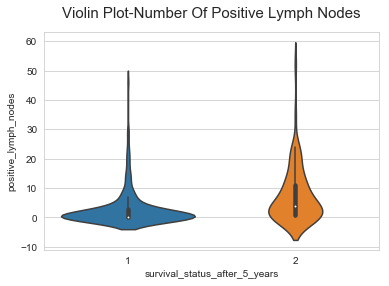

In [49]:
sns.violinplot(x ='survival_status_after_5_years',y='positive_lymph_nodes',data= haberman_df )
plt.title("Violin Plot-Number Of Positive Lymph Nodes",fontsize=15,y=1.04)
plt.show();

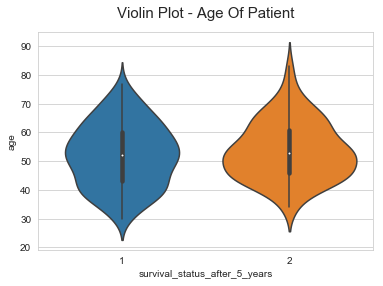

In [50]:
sns.violinplot(x ='survival_status_after_5_years',y='age',data= haberman_df )
plt.title("Violin Plot - Age Of Patient",fontsize=15,y=1.04)
plt.show();

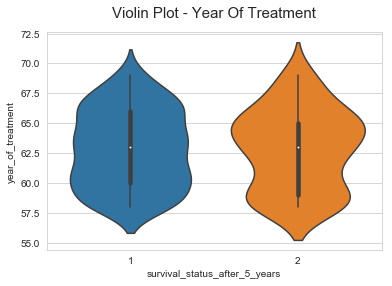

In [51]:
sns.violinplot(x ='survival_status_after_5_years',y='year_of_treatment',data= haberman_df )
plt.title("Violin Plot - Year Of Treatment",fontsize=15,y=1.04)
plt.show();

Observations:
The number of positive lymph nodes of the survivors is highly densed from 0 to 3.

Final Conclusions:

The feature most important to predict whether patient will survive more than 5 years is the number of positive auxilary nodes

Patients who survived more than 5 years had positive axillary nodes densed from 0-5 while patients who died within 5 years had positive axillary nodes densed from 0-20.

Dataset is imbalanced with less number of datapoints belonging to patients who died within 5 years. Dataset has no missing values. Data classes are not linearly seperable.

The positive axillary nodes vary from 0 to 52. But 25% of patients having 0 positive auxillary nodes, 50% of patients having less than or equal to 1 positive auxillary nodes and 75% of the patients having less than or equal to 4 positive auxillary nodes.

Deaths of patients treated around year 1958  is more compared to deaths of patients in other years.

Patients with age>80 has very less probability to survive more than 5 years